# importando/conhecendo os dados

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from google.colab import files
import io
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
# vscode ou jupyter notebook
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')

# google collab
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
# google collab
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes


In [0]:
# google collab
train_df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
test_df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualizando os dados

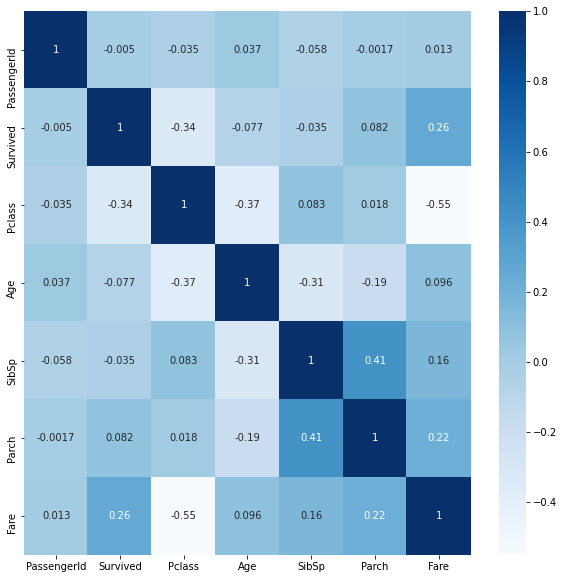

In [14]:
# Mapa de calor com correlação das colunas
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cmap="Blues")

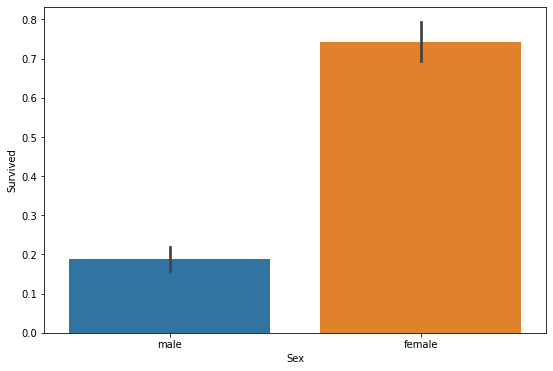

In [16]:
# Análise sexo x sobreviventes
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=train_df)

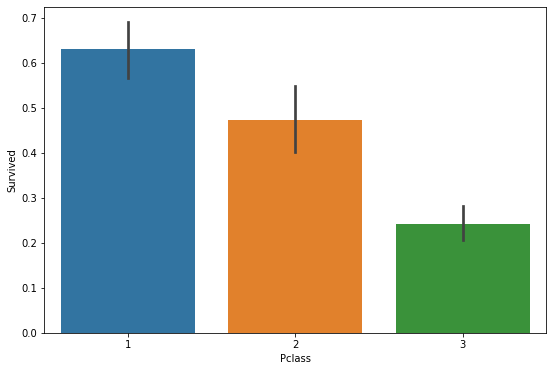

In [17]:
# Análise Classe x Sobreviventes
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=train_df)

# Limpando dados

In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [0]:
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
# criando um modelo sem valores não numericos, pois a média so funciona (pasmem!) para números 
train_numerico = train_df.drop(['Sex','Embarked'], axis=1)
test_numerico = test_df.drop(['Sex','Embarked'], axis=1)

In [0]:
train_no_null = imputer.fit_transform(train_numerico)
test_no_null = imputer.fit_transform(test_numerico)

In [0]:
train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

In [60]:
train_tr.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Manipulando valores categóricos


In [0]:
# separando colunas categóricas para transformar em númericas
train_cat = train_df[['Sex', 'Embarked']]
test_cat = test_df[['Sex', 'Embarked']]

In [0]:
train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)


In [63]:
train_cat_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [0]:
# train.tr = valores númericos | train.cat = valores categoricos 
new_train = train_tr.join(train_cat_encoded)
new_test = test_tr.join(test_cat_encoded)

In [0]:
predictors = new_train.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.33


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.92


In [0]:
ids = test_df['PassengerId']
predictions = gbk.predict(new_test.drop('PassengerId', axis=1))

In [0]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)

In [0]:
# google collab download
files.download('submission.csv')